## Challenge VIII: List Locally

## Call Openstates API for Legislation Data

In the cell below, we have the main API call parameters dictionary that utilizes the Challenge_8_Engine.ipynb file with all the custom built functions that wrangle the data for use with machine learning algorithms. The goal, to have a series of features that can help predict vote outcomes at the house and senate level. Features included in final dataset:

    1. The party majority (See function party_counter) as col: 'bill_party_affiliation'
    2. Bill subject breakdowns (subject column is distributed into individual subject names up to the max amount of subjects detected on all bills returned)
    3. Bill vote details: Col 'vote_info.support/oppose/other' to get this info, see function "unpack_votes" as it finds the latest vote instance and returns the yes/no/other counts and determines which is greater. The winning count determines the response variable 'result'.
    4. state_party_affiliation: A column that labels the chosen states political party affiliation as of 2023. I would advise making a more sophisticated way of finding this information as I just used a simple 'state_party_finder' function to map the state abbreviation to its current party letter (R or D).
    
    
#### Function Parameter Dicitonary:
p_start, p_end: These params are for grabbing a range of pages. Can only use increments of 10 in conjunction with the call_count parameter for how many sets of 10 to grab after setting your starting page.

    p_start: Enter the starting page as integer exp: 250. Notice the max page info printed to console when running the api call function. This Should read out as: 'Max pages for state ['selected state']: max_page_number'.

    call_count: This param is for how many sets of 10 pages worth of bill info to return. For instance, setting this to 2 means 20-page results worth of data. Bear in mind that the API of Openstates is limited to the following:
    
    state_list: A list of string abbreviations for states to pull bill legislation data from. This is temperamental and has only been tested on 3 states so far. WA, VA, AL without issues. See limitations section for more details on problems with state_list.


#### Function Overview:

run_daily_api_limit is designed to use a free openstates license and return as many page results for bill legislation data as possible for the desired state. The function does not allow for specification of particular legislators or session ranges at this time for the purpose of returning as many bills as possible for the desired state. This is also due to a few limitations of the API data structure that will be listed below.


#### Limitations:

1. Lack of session setting for API: At first, session seemed like a natural parameter to have for this API call. However, it turns out that each state has different ways of referring to bill sessions. For instance, VA uses the simple one year "2022", "2023" session name where WA uses "2022-2023rs" for their session names. Because of this, the column is returned for ML algo purposes, but data is not filtered by session because a 50-state wide cross reference mapping solution would be needed to take in user session input and correct it to the corresponding state format.


2. The state_list param is built to pass multiple states and concatenate the data from each state's bills on top of the previous after running through the specified number of pages and call_count. However, subtle .json differences within Openstates API returned data may differ from state to state. 

#### API LIMITS FOR FREE OPENSTATES LICENSE:

3. Openstates API:
    1. 10 Calls per minute: the api calling function is wired for 10 calls per call_count already
    2. 250 API Calls per day: This means a MAX of 25 call_count is permitted per API key.
    3. A max of 20 results per page is set by Openstates. The API call function "get_legislation_data" already accounts for this.
    
#### Recommendations for improving this code:

1. Consider a formal license with Openstates for less API Restrictions. This apikey could simply replace the current free one and allow for a high call_count number to run and collect many more json files worth of bill data!

2. Also consider https://legiscan.com/legiscan. This resource has exceptional data for tracking legislators down to their https://www.followthemoney.org/ ID, allowing for much more in-depth analytics.


## FUNCTION INSTRUCTIONS 

In the cell below, there are 4 parameters that need adjustment.

   1. Change 'apikey' var to your openstates apikey. Register for free at www.openstates.org to obtain.
   2. Change 'p_start' to a start page in increments of 10. 0, 10, 20, 30, etc. The function will automatically increment the page ranges based on the next parameter.
   3. Change call_count to the number of page ranges desired to grab. Max of 25 call counts per apikey per day.
   4. change 'state_list' to the 2 letter abbreviation of the state you desire to grab legislation info from.
   
#### Notes/considerations:

The only issue with this api-calling approach is retrieval of bills that have BOTH a populated 'subject' line and a populated 'votes' section within the json retrieved from Openstates. I have tested my code against 25/50 states and it is hit or miss on which states actually have these column values. WA, AZ, AK do have them and were used for the modeling in dataiku.

If you run the function and it grabs more pages than are available, it will break.

In [ ]:
%run Challenge_8_Engine.ipynb
'''
========================================================================================
                                API CALL USER INTERFACE
========================================================================================
Swing states: AZ Y, CO X, FL X, GA, IO x, MI, MN X, NV X, NH, NC X, OH X, PA X, VA, WI X
'''
#enter the state abbreviation in lowercase with quotes exmp: 'wa', 'va'
state_list = ['wa']
#enter the starting page as integer exp: 250. Notice the max page info printed to console when 
p_start = 10
#set this for the number of page ranges to grab. 
#call_count = 2: 20 p_start x 20 call_count = 400 possible bill results before filtering.
call_count = 25

###############CHANGE THIS TO YOUR APIKEY###########################
apikey  = 'YOUR_OPENSTATES_APIKEY_GOES_HERE'
###################################################################
p_end = p_start + 10
run_daily_api_limit(apikey6, state_list, p_start, p_end, call_count)

## Code breakdown

WARNING: Only states with a populated subject and vote field json will work with this function. WA is the default state used for testing.

In this code, we first set up the API endpoint URL for the OpenStates API, along with the required parameters for retrieving vote information. We then send an HTTP GET request to the API endpoint using the requests.get() function (which can be seen in the Challenge_8_Engine.ipynb function 'get_legislation_data') passing in the URL and request parameters.

After retrieving the response from the API, we parse the JSON data using the .json() method, and extract the relevant vote and later subject information from the JSON data using dictionary key indexing. 

Finally, we export to json the extracted bill information to preserve column/row level integrity. A csv format would recognize chars such as ' " and , within the json preserved columns and break formatting. 


    
# List Locally Project Demands:

For the purpose of fulfilling the below data requirements, I have also included a csv of the final combined dataset of the three states. This csv named: ‘Final_Data_Out_AZ_WA_AK.csv’ has met the following requirements: 

1. where the legislation is being proposed or debated (which state? Which locality?), [X] Col: 'jurisdiction.name'

2. the issues the bill addresses, [X] Col: 'subject'

3. the name(s) of the bill sponsors - [X] Col:'vote_info' contains all voter names in 'support', 'opposed', and 'other' 

4. a link to the state or local website that tracks the legislation’s progress. [X] Col: 'openstates_url'

5. A list of each legislation’s support and opposition:[X] col: 'vote_counts' contains count of support for most recent vote instance

    i. elected officials who support or oppose it, [X][complete: stored in 'vote_info' col as a dictionary]
    
    ii. and outside advocacy groups and businesses lobbying in support or opposition of it. [NA] not possible with Openstates api at this time, but will work in near future as openstates and followthemoney.org are combining. For now, only a pro legiscan license would work for this.
    
    

6. Any connection the legislation has to other localities, states, or federal legislation. [X] Col: related bills. Note: this column was rarely populated across states and is likely in development by openstates. Will work in future updates to the api.

7. A list of data sources and confidence scores for each. [X] See works cited



## Works Cited with Confidence Scores

1. www.openstates.org: 90% CI score, based on their listed sources and extensive API documentation: https://docs.openstates.org/api-v3/

2. www.legiscan.org 95% CI Score: unused in the end but was initially used for manual data collection at start of project. However, this API is very limited for free licenses and prohibited use in this project. The documentation and columns available from their api are extremely valuable for legislation tracking. This data could also be combined with my final datasets via bill indentifier name as a primary key.

3. https://www.followthemoney.org 90% CI Score: This site has amazing row-level sponsorship information that will soon be integrated with openstates. See screenshot below, as this will likely be a openstates API call or possible external join to get legislator sponsorship data. 

4. https://www.dataiku.com 100% CI Score: the engine used for final data wrangling and ML model creation. The model documentation exported from this site along with the exported jupyter code is trustworthy and is used by tech companies around the world for much more complicated datasets and modeling practices than my purposes in this project. 

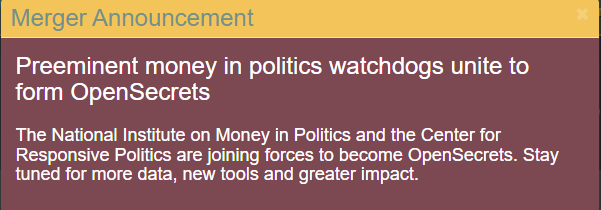

